These are study notes from the book [Introduction to Machine Learning with Python](http://shop.oreilly.com/product/0636920030515.do), by Andreas C. Müller and Sarah Guido. As machine learning and Python are currently new to me, I found useful to write down the code examples and some discussions presented on the book. The material below, except some notes done by myself, is taken from the chapter three, "Unsupervised Learning".

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import IPython
import IPython.display
import IPython.external
import pandas as pd
import wand.image

## Types of unsupervised learning

Unsupervised learning subsumes all kinds of machine learning which there is no known output, no teacher to instruct the learning algorithm. Only the input data is available to the algorithm and it is asked to extract knowledge from this data.

Two kinds of unsupervised learning in this chapter: data set transformations and clustering.

- *Unsupervised transformations*: create a new data representations, which might be easier for humans or other machine learning algorithms to understand. Dimensionality reduction is a common application of unsupervised transformations, which tries to find a new way to represent the data that summarizes its essential characteristics with few features. Usually, for visualization purposes it is desired to reduce dimensionality to two.

- *Clustering algorithms*: partition data into distinct groups of similar items. A good example is organizing photos in a social network, grouping together pictures showing the same person. A sensible approach would be to extract all faces and divide them into groups of similar looking faces.

### Challenges in unsupervised learning

A major challenge in unsupervised learning is evaluating whether the algorithm learned something useful. The algorithms are usually applied to non-labeled data, so it is difficult to know what the right output should be. Often, manual inspection is the only way to evaluate the results. 

As a consequence, unsupervised algorithms are often used in an exploratory setting, when a data scientist wants to have a better understand of the data, rather than as a part of larger automatic system. Another common applications is as a pre-processing step for supervised algorithms. Learning data new representations might improve supervised algorithms accuracy or can lead to reduced memory and time consumption.

## Pre-processing and Scaling	

Some supervised algorithms, like neural networks and SVMs, are very sensitive to data scaling. Therefore a commom practice is to adjust the features in order to construct a more suitable data representation to these algorithms. Below a simple comparison example in shown.

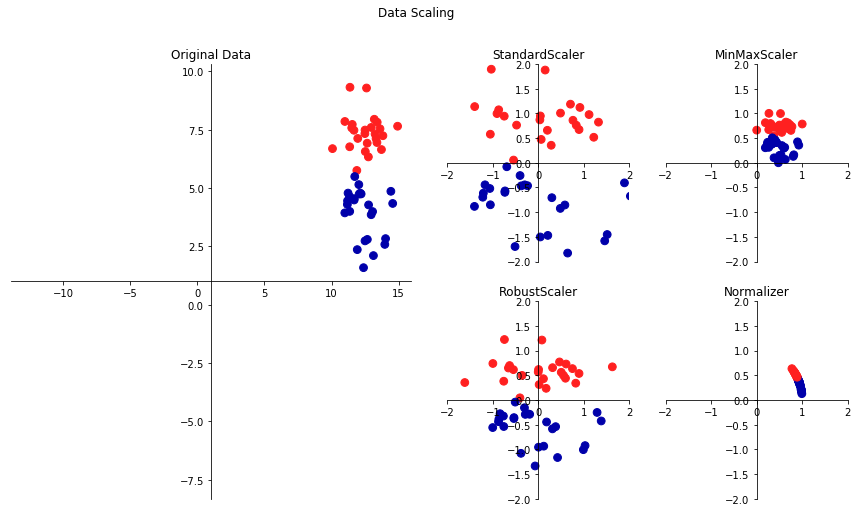

In [3]:
mglearn.plots.plot_scaling()
plt.suptitle("Data Scaling")
plt.show()

### Different kinds of pre-processing

- `StandardScaler`: ensures the mean is zero and the variance is one for each feature.
- `RobustScaler`: rescales each feature using median and quartiles, thus it ignores *outliers*.
- `MixMaxScaler`: shits the data such all features values are exactly between 0 and 1.
- `Normalizer`: scales every data point by the inverse of its euclidean length. In words words projects each data point in a euclidean circle (or sphere) with radius 1 (*feature vector* with length 1). Often used in the case when only the angle of the *feature vector* matters.

### Applying data transformations

As an example, say we want to apply the supervised algorithm kernel SVM to the `cancer` data set, and use then `MinMaxScaler` for pre-processing the data.

In [4]:
# First, we split the data set.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

# Remember that the `train_test_split` function "randomly" splits the data set: 75% of the 
# samples to the training set and 25% to the test set.
print(cancer.data.shape)
print(X_train.shape)
print(X_test.shape)

(569, 30)
(426, 30)
(143, 30)


In [5]:
# Import the class implementing the pre-processing. Then instantiate it and fit the scaler 
# using the `fit` method.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

It is crucial to note `scaler` is fitted based on a particular data set, which is `X_train` is this case. That means it is defined as a mathematical transformation that rescales `X_train` based on `MinMaxScaler` properties.

In other words, as `scaler` is constructed based on `X_train`, it is not necessarily going to work in the same way on different data sets, such as `X_test`. We going to check that below.

In [6]:
# To actually scale the data, we run the `transform` method, which is used in scikit-learn 
# whenever a model returns a new data representation.
X_train_scaled = scaler.transform(X_train)

# For illustration purposes, we can compare the scaled first sample to the original
# sample. First, to condensate the way Python shows the results, we set some of the print options.

np.set_printoptions(suppress=True, precision=4)

X_train_scaled[1]

array([ 0.3776,  0.3176,  0.3679,  0.2307,  0.3366,  0.295 ,  0.1392,
        0.2395,  0.4136,  0.1819,  0.0625,  0.1299,  0.0666,  0.0337,
        0.123 ,  0.1419,  0.0388,  0.2249,  0.1094,  0.0663,  0.296 ,
        0.3777,  0.2923,  0.1535,  0.3971,  0.3028,  0.1542,  0.5117,
        0.3317,  0.316 ])

In [7]:
X_train[1]

array([  14.96  ,   19.1   ,   97.03  ,  687.3   ,    0.0899,    0.0982,
          0.0594,    0.0482,    0.1879,    0.0585,    0.2877,    0.948 ,
          2.171 ,   24.87  ,    0.0053,    0.0211,    0.0154,    0.0119,
          0.0152,    0.0028,   16.25  ,   26.19  ,  109.1   ,  809.8   ,
          0.1313,    0.303 ,    0.1804,    0.1489,    0.2962,    0.0847])

In [8]:
# We can also take a look at the minimum and maximum values per feature in the original data. 

X_train.min(axis=0)

array([   6.981 ,    9.71  ,   43.79  ,  143.5   ,    0.0526,    0.0194,
          0.    ,    0.    ,    0.106 ,    0.0502,    0.1153,    0.3602,
          0.757 ,    6.802 ,    0.0017,    0.0023,    0.    ,    0.    ,
          0.0095,    0.0009,    7.93  ,   12.02  ,   50.41  ,  185.2   ,
          0.0712,    0.0273,    0.    ,    0.    ,    0.1566,    0.0552])

In [9]:
X_train.max(axis=0)

array([   28.11  ,    39.28  ,   188.5   ,  2501.    ,     0.1634,
           0.2867,     0.4268,     0.2012,     0.304 ,     0.0958,
           2.873 ,     4.885 ,    21.98  ,   542.2   ,     0.0311,
           0.1354,     0.396 ,     0.0528,     0.0615,     0.0298,
          36.04  ,    49.54  ,   251.2   ,  4254.    ,     0.2226,
           0.9379,     1.17  ,     0.291 ,     0.5774,     0.1486])

In [10]:
# And after the scaling process. The minimum is 0 and the maximum is 1, as expected after the
# `MinMaxScaler` pre-processing.

X_train_scaled.min(axis=0)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.])

In [11]:
X_train_scaled.max(axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.])

In [12]:
# To apply the SVM algorithm to the scaled data, the test set must be transformed as well.

X_test_scaled = scaler.transform(X_test)

In [13]:
# As we have warned before, the transformation provided by `scaler` will not necessarily 
# work in the same way on the test set, since it was constructed based on the training set.

X_test_scaled.min(axis=0)

array([ 0.0336,  0.0227,  0.0314,  0.0114,  0.1413,  0.0441,  0.    ,
        0.    ,  0.154 , -0.0062, -0.0014,  0.0059,  0.0043,  0.0008,
        0.0392,  0.0112,  0.    ,  0.    , -0.0319,  0.0066,  0.0266,
        0.0581,  0.0203,  0.0094,  0.1094,  0.0264,  0.    ,  0.    ,
       -0.0002, -0.0018])

In [14]:
X_test_scaled.max(axis=0)

array([ 0.9579,  0.815 ,  0.9558,  0.8935,  0.8113,  1.2196,  0.8796,
        0.9334,  0.9323,  1.0371,  0.4267,  0.4977,  0.4412,  0.2837,
        0.487 ,  0.7386,  0.7672,  0.6293,  1.3369,  0.3906,  0.8961,
        0.7932,  0.8486,  0.7449,  0.9155,  1.1319,  1.0701,  0.9237,
        1.2053,  1.6307])

### Scaling training and test data the same way

It is important the exactly same transformation is is applied to the both training and test sets for the supervised model makes sense when applied to the test set.

In [15]:
# To illustrate, lets use the `make_blobs` data set, where each sample has two features.

from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=50, centers=50, random_state=4, cluster_std=2)
# For this illustration assignment, the target is not important.
X_train, X_test = train_test_split(X, random_state=5, test_size=0.1)

X_train[:6]

array([[ 3.3516,  2.8603],
       [ 7.7855, -3.1455],
       [-0.4067, -0.7666],
       [ 3.3074,  7.8493],
       [-0.2108,  0.2859],
       [-0.7144,  4.5312]])

The following figure illustrates what would have happened if a particular transformation was create to scale both the training ahd the test set to the range [0,1]. Note that, while the correct transformation just shifts both training and test sets, the improper procedure arbitrarily changes the arrangement of the test set, which is completely incorrect, because it is actually changing the test points with respect to the training set. 

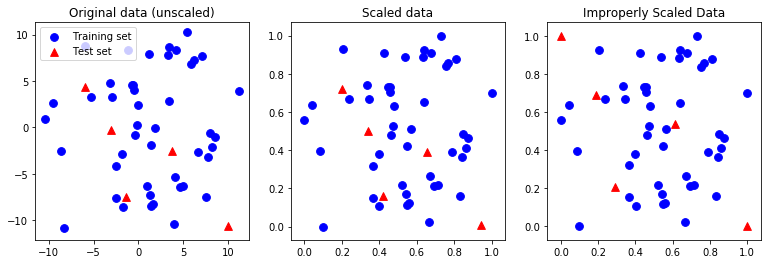

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

# Plotting training and test set without scaling.
axes[0].scatter(X_train[:, 0], X_train[:, 1], c='b', label='Training set', s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], c='r', label='Test set', s=60, marker='^')
axes[0].legend(loc='upper left')
axes[0].set_title("Original data (unscaled)")

# Applying and plotting the proper scaling procedure. Same transformation both on 
# training and test set.
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c='b', label='Training set', s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c='r', label='Test set', s=60, marker='^')
axes[1].set_title("Scaled data")

# Applying and plotting the improper scaling procedure. Different transformations on training
# and test set. This is not the correct procedure, it is done here just for illustration purposes.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_improperly = test_scaler.transform(X_test)

axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c='b', label='Training set', s=60)
axes[2].scatter(X_test_scaled_improperly[:, 0], X_test_scaled_improperly[:, 1],
                c='r', label='Test set', s=60, marker='^')
axes[2].set_title("Improperly Scaled Data")

# Showing the plot.
plt.show()

### The effect of preprocessing on supervised learning

Now we go back to the the `cancer` data set to check the effect of `MinMaxScaler` on learning the `SVC`. This is a more practical way of doing the same scaling done on the Supervised Learning chapter.

As it was seen before the data scaling effect is quite significant in this case.

In [17]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.62937062937062938

In [18]:
# Pre-processing data with MinMaxScaler.
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Learning a SVM model on the scaled training data.
svm.fit(X_train_scaled, y_train)

# Scoring on the scaled test set.
svm.score(X_test_scaled, y_test)

0.965034965034965

Naturally, other pre-processing algorithms can be implemented by same procedure we followed with `MinMaxScaler`. For example, one could choose `StardardScaler`:

In [19]:
# Pre-processing data with zero mean and unit variance scaling.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Learning a SVM model on the scaled training data.
svm.fit(X_train_scaled, y_train)

# Scoring on the scaled test set.
svm.score(X_test_scaled, y_test)

0.95804195804195802

## Dimensionality Reduction, Feature Extraction and Manifold Learning 

Transforming data when using unsupervised learning can have many motivations. The most commom ones are visualization, compressing the data and finding a more informative representation for further processing. One of the simplest and most widely used algorithm for all od these is Principal Component Analysis.

### Principal Component Analysis (PCA)

The principal component analysis method rotates the data set in a way such the rotated features are statistically uncorrelated. This rotation is often followed by selecting a subset of the new features, according to how important they are for explaining the data. Below we discuss the next illustration figure, which shows an example on a synthetic two-dimensional data set.

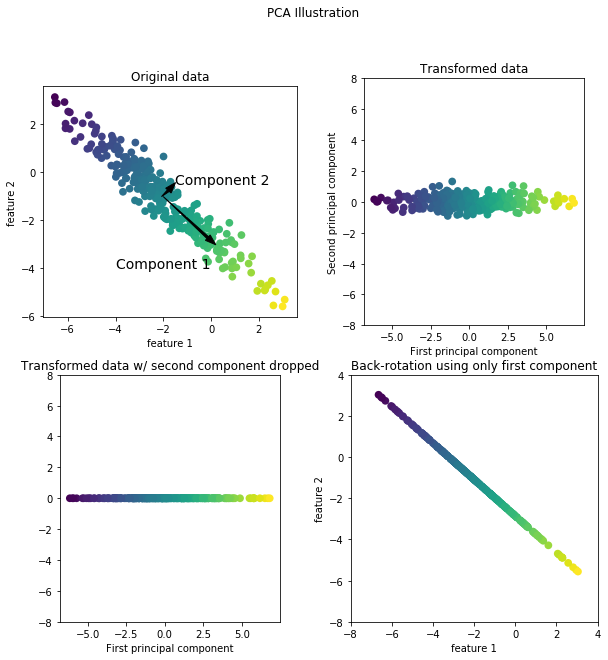

In [20]:
mglearn.plots.plot_pca_illustration()
plt.suptitle("PCA Illustration")
plt.show()

The first plot displays the original data points, colored to distinguish the points. The algorithm proceeds by first finding the maximum variance direction, which is labeled as "Component 1". This is the direction along which the features are most correlated with each other, or in other words the direction that contains most of the information (despite of the arrows, what matters is just the direction; arrows were drawn just for illustration purposes).

Then the algorithm finds the orthogonal direction to "Component 1" which contains most of the information. In two dimensions there is only one possible orientation, but in higher dimensional spaces there would be infinite orthogonal directions.

The directions found by the process are called *principal components*, as they are the main variance directions in the data. In general there are as many principal components as original features.

In the second plot, the data point are rotate in a way the first principal component aligns with the x axis and the second with the y axis. Additionally, before the rotation, the data was centered around zero (the respective mean was subtracted for each feature).

In the PCA rotated representation the two components are uncorrelated. That means in this representation the data correlation matrix is zero except for the diagonal.

The PCA method can be used for dimensionality reduction by retaining only some the principal components. In this case, one might keep only the first principal component, as shown in the third plot. This reduces the data from a two-dimensional data set to just one dimension. 

It is important to note instead of keeping only one of the original features, we are actually storing the most important direction, which contains both of the features. There is a dimensionality reduction but information about the two features is being kept.

Finally, the rotation can be undone and the mean can be added back (fourth plot). The points are in the original feature space, but only the information in the first principal component was kept. This procedure is sometimes used to remove noise effects from the data or to visualize what part of information is kept in the PCA.



#### Applying PCA to the cancer data set for visualization.

One the most common application of PCA is visualizing high-dimensional data sets, because in this case it is hard to extract information from scatter plots. 

We could remember the `iris` data set, which has four features. On that time we constructed six scatter plots, as below.

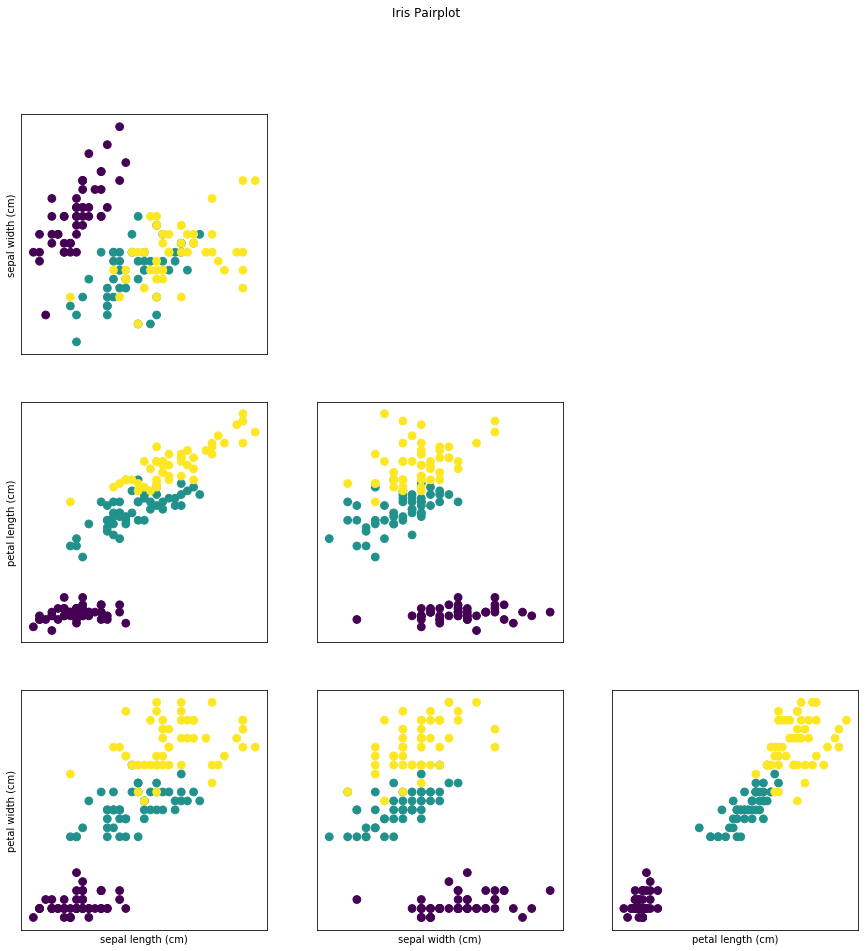

In [21]:
from sklearn.datasets import load_iris
iris = load_iris()

fig, ax  = plt.subplots(3, 3, figsize=(15, 15))
plt.suptitle("Iris Pairplot")

for i in range(3):
    for j in range(3):
        ax[i, j].scatter(iris['data'][:, j], iris['data'][:, i + 1], c=iris['target'], s=60)
        ax[i, j].set_xticks(())
        ax[i, j].set_yticks(())
        if i == 2:
            ax[i, j].set_xlabel(iris['feature_names'][j])
        if j == 0:
            ax[i, j].set_ylabel(iris['feature_names'][i + 1])
        if j > i:
            ax[i, j].set_visible(False)

plt.show()

Obviously, it is harder to extract information via scatter plots in a data set with more features, since one would have to inspect a great number of scatter plots. Again, a nice example is the `cancer` data set, where many scatter plots would be needed, because there are 30 features in this data set.

In order to have some visualization insight, one could construct histograms for each feature for the two classes, malignant and benign.

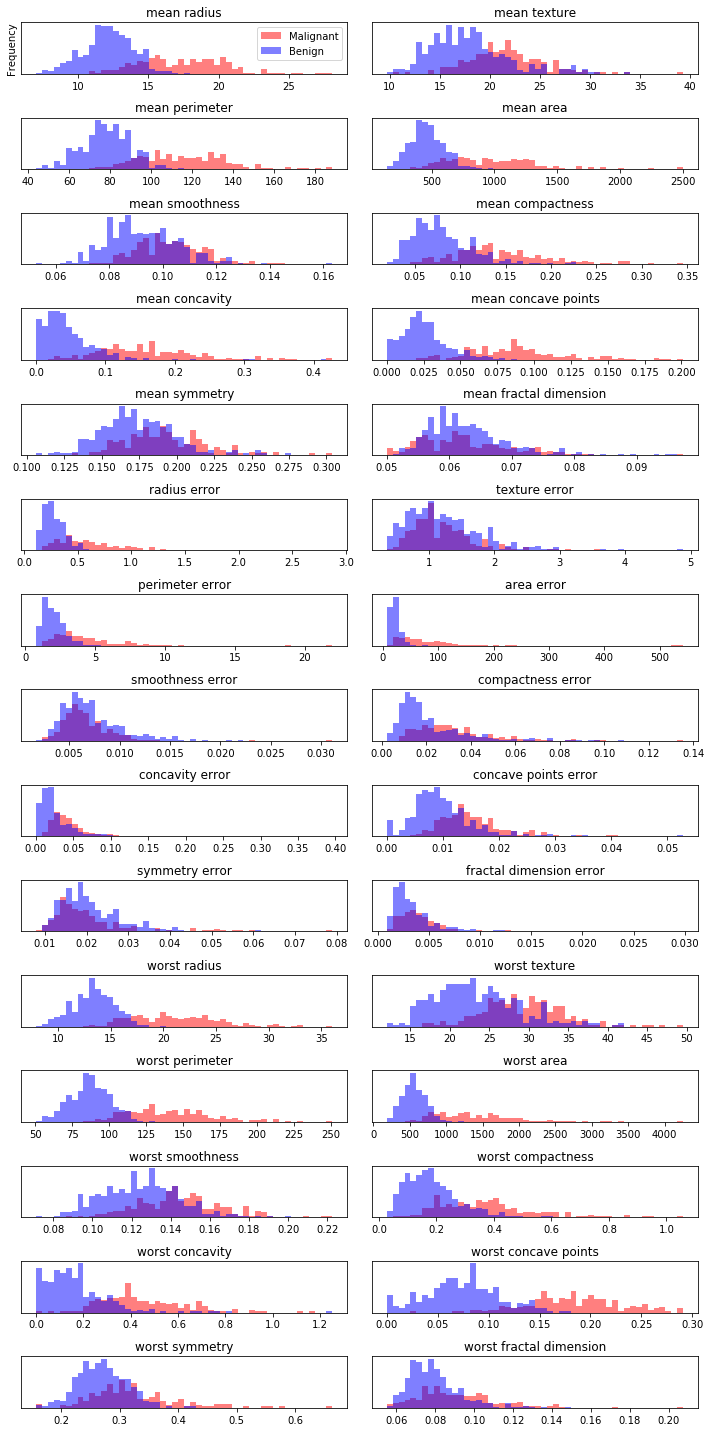

In [22]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color='r', alpha=0.5)
    ax[i].hist(benign[:, i], bins=bins, color='b', alpha=0.5)
    # Red histograms for malignant and blue for benign.
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].legend(["Malignant", "Benign"], loc="best")
ax[0].set_ylabel("Frequency")
fig.tight_layout()

plt.show()

This set of histograms can give some idea of how each feature is distributed across the two classes. The overlap between the classes can also give some thoughts about which of the features are the most informative one.

However, the histograms do not provide visible information about correlation between features. On the other hand, the PCA approach could find the first two principal components and we could visualize the date in this new two-dimensional space, wiht a single scatter plot.

In [23]:
# Before applying PCA, we rescale the data so that each feature has variance one.

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [23]:
# Learning the PCA transformation and applying it is as simple as applying the pre-processing 
# transformation. We instantiate the PCA object, find the principal components by calling the 
# `fit` method and then apply the rotation and dimensionality reduction by calling `transform`.

In [24]:
# By default, PCA only rotates and shifts the data, but keeps all principal components. To reduce
# data dimensionality it is needed to specify, when creating the PCA object, how many components
# must be kept.

from sklearn.decomposition import PCA
# Keep the first two principal components.
pca = PCA(n_components=2)
# Fit the PCA model to breast cancer data.
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
# Transform data onto the first two principal components.
X_pca = pca.transform(X_scaled)

In [26]:
# We can explicitly check the dimensionality reduction and plot the first two principal components.

In [27]:
print(X_scaled.shape)
print(X_pca.shape)

(569, 30)
(569, 2)


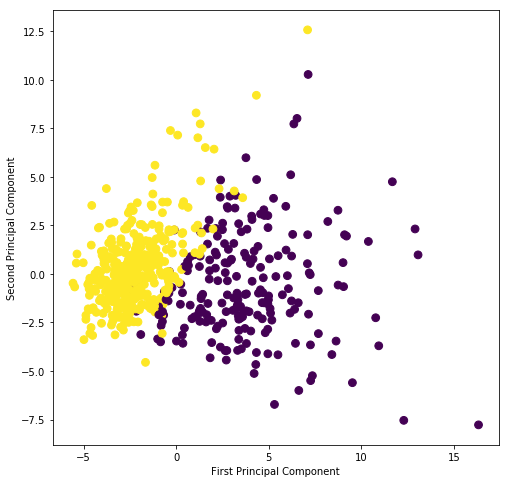

In [37]:
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cancer.target, s=60)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()